# 作業 : (Kaggle)房價預測

# [作業目標]
- 試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

# [作業重點]
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = 'D:/morenda/100Day-ML-Marathon/Day_010/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [2]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [4]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


#### 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

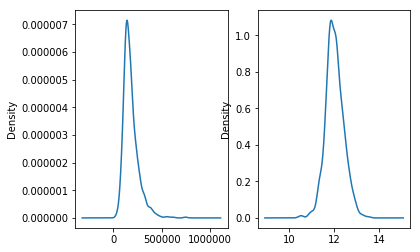

In [36]:
# 載入套件
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
## 讀取資料
house = pd.read_csv('D:/morenda/100Day-ML-Marathon/Day_010/house_train.csv.gz')
# 拋棄'id'欄位
house = house.drop(labels=['Id'], axis=1)
# 將資料中的數值型變數選出
numlist = []
for i in house.columns:
    if house[i].dtypes in ['float64', 'int64']:
        numlist.append(i)
house[numlist].isnull().any() # 檢視有遺漏值的欄位
house = house[numlist].fillna(-1) # 將有遺漏值的觀察值先以-1填入
# 資料分割
X_train = house.drop('SalePrice', axis = 1)
y_train = house['SalePrice']
# 檢視 y_train 資料偏態
plt.subplot(1,2,1)
y_train.plot(kind = 'density') # 原始資料
plt.subplot(1,2,2)
np.log1p(y_train).plot(kind = 'density') # 經log轉換資料屬性較符合常態
logy_train = np.log1p(y_train)


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


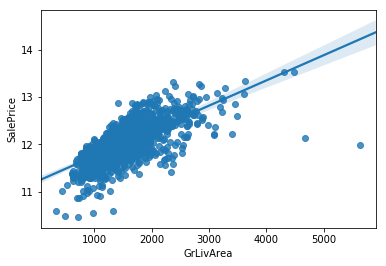

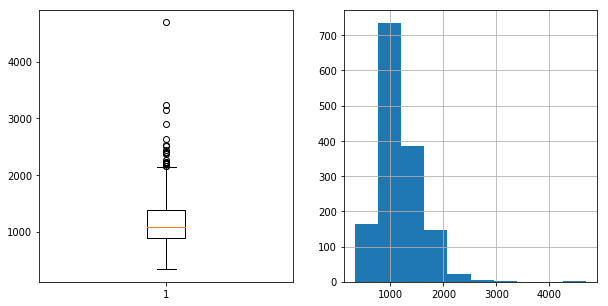

In [37]:
import seaborn as sns
sns.regplot(x = house['GrLivArea'], y = logy_train)
# 載入極值正規化套件
from sklearn.preprocessing import MinMaxScaler
MIMA = MinMaxScaler()
house_M = pd.DataFrame(MIMA.fit_transform(X_train), columns=X_train.columns)
# 迴歸模型建立
lr = LinearRegression()
cross_val_score(lr, house_M, logy_train, cv = 5).mean()
# 做線性迴歸, 觀察分數
#train_X = MMEncoder.fit_transform(df)
#estimator = LinearRegression()
#cross_val_score(estimator, train_X, train_Y, cv=5).mean()
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(house['1stFlrSF'])
plt.subplot(1,2,2)
house['1stFlrSF'].hist()

In [38]:
# 根據上述盒鬚圖以及直方圖，大致掌握'1stFlrSF'資料分佈在1000 ~ 2000 之間
print(house['1stFlrSF'].quantile(np.arange(0,1.25,0.25)))
# 根據四分位數資料顯示，clip取值範圍882 ~ 1500之間

0.00     334.00
0.25     882.00
0.50    1087.00
0.75    1391.25
1.00    4692.00
Name: 1stFlrSF, dtype: float64


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8850584739665956

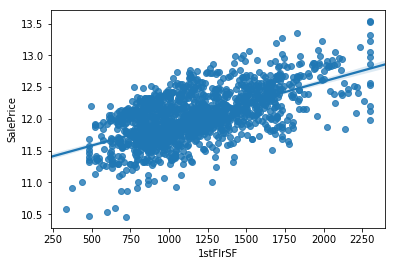

In [39]:
lrX_train = X_train.copy()
lrX_train['1stFlrSF'] = lrX_train['1stFlrSF'].clip(100, 2300)
sns.regplot(lrX_train['1stFlrSF'], logy_train)
MIMA = MinMaxScaler()
house_M = MIMA.fit_transform(lrX_train)
lr = LinearRegression()
cross_val_score(lr, house_M, logy_train).mean()

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

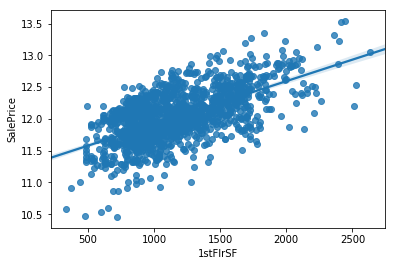

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8946195076258355

In [34]:
# 將1stFLrSF限制在你覺得適合的範圍內捨棄離群值
i = (df['1stFlrSF'] > 50) & (df['1stFlrSF'] < 2800)
df = df[i]
logy_train = logy_train[i]
sns.regplot(x = df['1stFlrSF'], y = logy_train)
plt.show()

train_x = MIMA.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator,train_x, logy_train, cv=5).mean()

In [ ]:
#結論: 刪除離群值績效指標較高，可能因為減少離群值的干擾讓模型預設較為準確。